<a href="https://colab.research.google.com/github/da3gal/ml-casebook/blob/main/PBL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 2/BA_AirlineReviews_CL_excel.xlsx')
dataset.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
dataset_dtypes = dataset.dtypes
dataset_missingvalues = dataset.isnull().sum()
rows, columns = dataset.shape

print(rows, ',', columns, '\n\n', dataset_dtypes, '\n\n', dataset_missingvalues)

3701 , 20 

 id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object 

 id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview      

In [ ]:
missing_percentage = dataset.isnull().mean() * 100
print(missing_percentage)

id                        0.000000
Satisfaction              0.000000
ReviewHeader              0.000000
Name                      0.000000
Datetime                  0.000000
VerifiedReview            0.000000
ReviewBody                0.000000
TypeOfTraveller          20.832208
SeatType                  0.054039
Route                    20.940286
DateFlown                21.021346
SeatComfort               3.134288
CabinStaffService         3.431505
GroundService            22.858687
ValueForMoney             0.027020
Recommended               0.000000
Aircraft                 48.068090
Food&Beverages           10.429614
InflightEntertainment    31.072683
Wifi&Connectivity        83.544988
dtype: float64


# Data Cleansing

Removing Unwanted Features

In [ ]:
dataset_dropcol = dataset.drop(['id', 'ReviewHeader', 'Datetime', 'ReviewBody', 'SeatType', 'Wifi&Connectivity',
                                'Aircraft', 'DateFlown', 'Name'], axis=1)
dataset_dropcol.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,Route,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment
0,Very Dissatisfied,True,Couple Leisure,London to Stuttgart,1.0,1.0,1.0,1.0,no,NaN,NaN
1,Neutral,True,Business,Brussels to London,2.0,3.0,1.0,2.0,no,1.0,2.0
2,Enthusiastic,False,Couple Leisure,London Heathrow to Dublin,3.0,3.0,4.0,3.0,yes,4.0,NaN
3,Very Dissatisfied,True,Couple Leisure,London to Dublin,3.0,3.0,1.0,1.0,no,NaN,NaN
4,Very Dissatisfied,False,Couple Leisure,London to Lisbon,1.0,1.0,1.0,1.0,no,1.0,1.0


In [ ]:
dataset_dropcol.shape

(3701, 11)

Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

dataset_missingvaluehandled = dataset_dropcol.copy()

imputer = SimpleImputer(strategy='constant', fill_value=0)  # imputing using constant value 0
dataset_missingvaluehandled.iloc[:,:] = imputer.fit_transform(dataset_missingvaluehandled)

dataset_missingvaluehandled.isnull().sum()

Satisfaction             0
VerifiedReview           0
TypeOfTraveller          0
Route                    0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Food&Beverages           0
InflightEntertainment    0
dtype: int64

# Feature Processing

In [ ]:
dataset_featureengineering = dataset_missingvaluehandled.copy()

### Feature Engineering & Encoding on "Route"

In [ ]:
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route'].apply(lambda x: x.split(' to ')[0] if isinstance(x, str) else x) # sebelum
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].apply(lambda x: x.split(' via ')[0] if isinstance(x, str) else x) # sebelum
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].apply(lambda x: x.split('-')[0] if isinstance(x, str) else x) # penanganan ROUTE-ROUTE
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Departure'].apply(lambda x: x.split(' ')[1] if isinstance(x, str) and ' ' in x else x) # penanganan LONDON SINGAPORE
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].str.replace(' Singapore', '') # penanganan LONDON SINGAPORE
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].fillna(0) # penanganan missing value di kolom Route Departure

dataset_featureengineering[['Route', 'Route Arrival']] = dataset_featureengineering['Route'].str.split(' to', 1, expand=True)
dataset_featureengineering = dataset_featureengineering.drop('Route', axis=1)
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.split(' via', 1).str[0]
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.replace(r',.*', '')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.split(' to', 1).str[0]

<ipython-input-9-38353aefe68a>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset_featureengineering[['Route', 'Route Arrival']] = dataset_featureengineering['Route'].str.split(' to', 1, expand=True)
<ipython-input-9-38353aefe68a>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.split(' via', 1).str[0]
<ipython-input-9-38353aefe68a>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.replace(r',.*', '')
<ipython-input-9-38353aefe68a>:12: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
 

Text Standardize on "Route Departure"

In [ ]:
# London
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London City Airport', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LHR', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LHR ', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Heathrow', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London Heathrow', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London Heathrow ', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London Heatrow', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London-Heathrow', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Heathrow (London)', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LGW', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London LGW', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('lgw', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Gatwick', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London Gatwick', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LCY', 'London')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('London City', 'London')

# Thailand
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BKK', 'Bangkok')

# New York
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('JFK', 'New York')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('New York JFK', 'New York')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('New York ', 'New York')

# Manchester
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MAN', 'Manchester')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Manchester, UK', 'Manchester')

# Glasgow
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GLA', 'Glasgow')

# Singapore
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SIN', 'Singapore')

# Toronto
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('YYZ', 'Toronto')

# Amsterdam
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('AMS', 'Amsterdam')

# Miami
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MIA', 'Miami')

# Miami
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('HKG', 'Hong Kong')

# Athens
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ATH', 'Athens')

# Johannesburg
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('JNB', 'Johannesburg')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Johannesburg OR Tambo', 'Johannesburg')

# San Francisco
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SFO', 'San Francisco')

# Edinburgh
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('EDI', 'Edinburgh')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Edimbourgh', 'Edinburgh')

# Vancouver
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('YVR', 'Vancouver')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Vancouver Canada', 'Vancouver')

# Dulles
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('IAD', 'Dulles')

# Dubai
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DXB', 'Dubai')

# Sydney
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SYD', 'Sydney')

# Seattle
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SEA', 'Seattle')

# Las Vegas
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LAS', 'Las Vegas')

# Philadelphia
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PHL', 'Philadelphia')

# Atlanta
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ATL', 'Atlanta')

# Barcelona
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BCN', 'Barcelona')

# Dublin
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DUB', 'Dublin')

# Milan
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MXP', 'Milan')

# Zurich
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ZRH', 'Zurich')

# Rio de Janeiro
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GIG', 'Rio de Janeiro')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Rio De Janeiro', 'Rio de Janeiro')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Rio de Janiero', 'Rio de Janeiro')

# Madrid
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MAD', 'Madrid')

# Los Angeles
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LAX', 'Los Angeles')

# Kuala Lumpur
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('KUL', 'Kuala Lumpur')

# Chicago
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ORD', 'Chicago')

# Dallas
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DFW', 'Dallas')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Dallas Fort-Worth', 'Dallas')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Dallas Ft Worth', 'Dallas')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Dallas Fort', 'Dallas')

# Paris
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CDG', 'Paris')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Paris CDG', 'Paris')

# Larnaca
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LCA', 'Larnaca')

# Malta
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MLA', 'Malta')

# Qatar
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DOH', 'Qatar')

# Cape Town
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CPT', 'Cape Town')

# Copenhagen
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CPH', 'Copenhagen')

# Tel Aviv
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('TLV', 'Tel Aviv')

# Frankfurt
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('FRA', 'Frankfurt')

# Geneva
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GVA', 'Geneva')

# Warsaw
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('WAW', 'Warsaw')

# Washington
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Washington Dulles', 'Washington')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Washington DC', 'Washington')

# Berlin
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('TXL', 'Berlin')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Berlin Tegel', 'Berlin')

# Vienna
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('VIE', 'Vienna')

# Naples
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('NAP', 'Naples')

# Abu Dhabi
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('AUH', 'Abu Dhabi')

# Boston
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BOS', 'Boston')

# Lisbon
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LIS', 'Lisbon')

# St Lucia
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('UVF', 'St Lucia')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('UVF ', 'St Lucia')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Saint Lucia', 'St Lucia')

# Leeds
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LBA', 'Leeds')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Leeds Bradford', 'Leeds')

# Nairobi
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('NBO', 'Nairobi')

# Riyadh
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('RUH', 'Riyadh')

# Marseille
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MRS', 'Marseille')

# Nassau
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('NAS', 'Nassau')

# Barbados
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BGI', 'Barbados')

# Accra
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ACC', 'Accra')

# Oslo
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('OSL', 'Oslo')

# Rome
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('FCO', 'Rome')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Rome Fiumicino', 'Rome')

# Tokyo
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Tokyo Haneda', 'Tokyo')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Tokyo Narita', 'Tokyo')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('HND', 'Tokyo')

# Basel
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BSL', 'Basel')

# Malaga
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('AGP', 'Malaga')

# Bucharest
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('OTP', 'Bucharest')

# Kuwait
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('KWI', 'Kuwait')

# San Diego
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SAN', 'San Diego')

# Mauritius
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MRU', 'Mauritius')

# Boryspil
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('KBP', 'Boryspil')

# Baltimore
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BWI', 'Baltimore')

# Budapest
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BUD', 'Budapest')

# Marrakesh
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('RAK', 'Marrakesh')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Marrakech', 'Marrakesh')

# Stockholm
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ARN', 'Stockholm')

# Munich
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MUC', 'Munich')

# Shanghai
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PVG', 'Shanghai')

# Phoenix
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PHX', 'Phoenix')

# Dusseldorf
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DUS', 'Dusseldorf')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Düsseldorf', 'Dusseldorf')

# Gothenburg
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GOT', 'Gothenburg')

# Sao Paulo
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GRU', 'Sao Paulo')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('São Paulo', 'Sao Paulo')

# Bangalore
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BLR', 'Bangalore')

# Sofia
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SOF', 'Sofia')

# Sofia
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SOF', 'Sofia')

# Helsinki
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('HEL', 'Helsinki')

# Dubrovnik
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DBV', 'Dubrovnik')

# Montreal
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('YUL', 'Montreal')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Montréal', 'Montreal')

# Sharm El Sheikh
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SSH', 'Sharm El Sheikh')

# Nice
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('NCE', 'Nice')

# Newcastle
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('NCL', 'Newcastle')

# Aberdeen
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ABZ', 'Aberdeen')

# Ibiza
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('IBZ', 'Ibiza')

# Lyon
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LYS', 'Lyon')

# Mexico City
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MEX', 'Mexico City')

# Abuja
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ABJ', 'Abuja')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ABV', 'Abuja')

# Prague
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PRG', 'Prague')

# Tehran
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('IKA', 'Tehran')

# Cancun
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CUN', 'Cancun')

# Chengdu
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CTU', 'Chengdu')

# Chennai
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MAA', 'Chennai')

# Seoul
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ICN', 'Seoul')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Seoul Incheon', 'Seoul')

# Chiang Mai
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CNX ', 'Chiang Mai')

# Bari
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BRI ', 'Bari')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BRI', 'Bari')

# Palma
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Palma de Mallorca', 'Palma')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PMI', 'Palma')

# Calgary
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('YYC', 'Calgary')

# San Jose
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SJO', 'San Jose')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SJC', 'San Jose')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('San Jose, CA', 'San Jose')

# Melbourne
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MEL', 'Melbourne')

# Manama
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BAH', 'Manama')

# Porto
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('OPO', 'Porto')

# Pisa
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PSA', 'Pisa')

# Oulu
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('OUL', 'Oulu')

# Gibraltar
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('GIB', 'Gibraltar')

# Cairo
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('CAI', 'Cairo')

# Moscow
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('DME', 'Moscow')

# Beijing
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PEK', 'Beijing')

# Seville
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('SVQ', 'Seville')

# Istanbul
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('IST', 'Istanbul')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('İstanbul', 'Istanbul')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Istambul', 'Istanbul')

# Turin
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('TRN', 'Turin')

# Austin
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('AUS', 'Austin')

# Punta Cana
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('PUJ', 'Punta Cana')

# Venice
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('VCE', 'Venice')

# Puerto del Rosario
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('FUE', 'Puerto del Rosario')

# Paris
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('ORY', 'Paris')

# Houston
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('IAH', 'Houston')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('iAH', 'Houston')

# Tampa
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('TPA', 'Tampa')

# St Petersburg
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('LED', 'St Petersburg')

# Funchal
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('FNC', 'Funchal')

# Jeddah
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('JED', 'Jeddah')

# Orlando
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('MCO', 'Orlando')
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Orlando, Florida', 'Orlando')

# Doha
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('doha', 'Doha')

# Amman Jordan
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Amman Jordan', 'Amman')

# Zurich
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Zürich', 'Zurich')

# Belfast
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Belfast City', 'Belfast')

# Mumbai
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('BOM', 'Mumbai')

# Keflavik
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].replace('Keflavik ', 'Keflavik')

In [ ]:
dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].fillna(0)

Text Standardize on "Route Arrival"

In [ ]:
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].str.lstrip()

# London
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London City Airport', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LHR', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LHR ', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Heathrow', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Heathrow', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Heathrow ', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Heatrow', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London-Heathrow', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Heathrow (London)', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LGW', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London LGW', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('lgw', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Gatwick', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Gatwick', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LCY', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London City', 'London')

# Thailand
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BKK', 'Bangkok')

# New York
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('JFK', 'New York')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('New York JFK', 'New York')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('New York ', 'New York')

# Manchester
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MAN', 'Manchester')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Manchester, UK', 'Manchester')

# Glasgow
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GLA', 'Glasgow')

# Singapore
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SIN', 'Singapore')

# Toronto
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('YYZ', 'Toronto')

# Amsterdam
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('AMS', 'Amsterdam')

# Miami
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MIA', 'Miami')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MIa', 'Miami')

# Hong Kong
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('HKG', 'Hong Kong')

# Athens
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ATH', 'Athens')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Athens Greece', 'Athens')

# Johannesburg
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('JNB', 'Johannesburg')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Johannesburg OR Tambo', 'Johannesburg')

# San Francisco
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SFO', 'San Francisco')

# Edinburgh
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('EDI', 'Edinburgh')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Edimbourgh', 'Edinburgh')

# Vancouver
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('YVR', 'Vancouver')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Vancouver Canada', 'Vancouver')

# Dulles
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IAD', 'Dulles')

# Dubai
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DXB', 'Dubai')

# Sydney
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SYD', 'Sydney')

# Seattle
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SEA', 'Seattle')

# Las Vegas
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LAS', 'Las Vegas')

# Philadelphia
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PHL', 'Philadelphia')

# Atlanta
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ATL', 'Atlanta')

# Barcelona
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BCN', 'Barcelona')

# Dublin
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DUB', 'Dublin')

# Milan
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MXP', 'Milan')

# Zurich
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ZRH', 'Zurich')

# Rio de Janeiro
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GIG', 'Rio de Janeiro')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Rio De Janeiro', 'Rio de Janeiro')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Rio de Janiero', 'Rio de Janeiro')

# Madrid
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MAD', 'Madrid')

# Los Angeles
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LAX', 'Los Angeles')

# Kuala Lumpur
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('KUL', 'Kuala Lumpur')

# Chicago
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ORD', 'Chicago')

# Dallas
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DFW', 'Dallas')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Dallas Fort-Worth', 'Dallas')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Dallas Ft Worth', 'Dallas')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Dallas Fort', 'Dallas')

# Paris
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CDG', 'Paris')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Paris CDG', 'Paris')

# Larnaca
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LCA', 'Larnaca')

# Malta
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MLA', 'Malta')

# Qatar
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DOH', 'Qatar')

# Cape Town
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CPT', 'Cape Town')

# Copenhagen
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CPH', 'Copenhagen')

# Tel Aviv
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('TLV', 'Tel Aviv')

# Frankfurt
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FRA', 'Frankfurt')

# Geneva
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GVA', 'Geneva')

# Warsaw
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('WAW', 'Warsaw')

# Washington
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Washington Dulles', 'Washington')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Washington DC', 'Washington')

# Berlin
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('TXL', 'Berlin')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Berlin Tegel', 'Berlin')

# Vienna
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('VIE', 'Vienna')

# Naples
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('NAP', 'Naples')

# Abu Dhabi
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('AUH', 'Abu Dhabi')

# Boston
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BOS', 'Boston')

# Lisbon
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LIS', 'Lisbon')

# St Lucia
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('UVF', 'St Lucia')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('UVF ', 'St Lucia')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Saint Lucia', 'St Lucia')

# Leeds
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LBA', 'Leeds')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Leeds Bradford', 'Leeds')

# Nairobi
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('NBO', 'Nairobi')

# Riyadh
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('RUH', 'Riyadh')

# Marseille
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MRS', 'Marseille')

# Nassau
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('NAS', 'Nassau')

# Barbados
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BGI', 'Barbados')

# Accra
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ACC', 'Accra')

# Oslo
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('OSL', 'Oslo')

# Rome
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FCO', 'Rome')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Rome Fiumicino', 'Rome')

# Tokyo
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tokyo Haneda', 'Tokyo')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tokyo Narita', 'Tokyo')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('HND', 'Tokyo')

# Basel
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BSL', 'Basel')

# Malaga
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('AGP', 'Malaga')

# Bucharest
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('OTP', 'Bucharest')

# Kuwait
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('KWI', 'Kuwait')

# San Diego
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SAN', 'San Diego')

# Mauritius
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MRU', 'Mauritius')

# Boryspil
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('KBP', 'Boryspil')

# Baltimore
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BWI', 'Baltimore')

# Budapest
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BUD', 'Budapest')

# Marrakesh
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('RAK', 'Marrakesh')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Marrakech', 'Marrakesh')

# Stockholm
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ARN', 'Stockholm')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Arlanda Stockholm', 'Stockholm')

# Munich
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MUC', 'Munich')

# Shanghai
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PVG', 'Shanghai')

# Phoenix
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PHX', 'Phoenix')

# Dusseldorf
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DUS', 'Dusseldorf')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Düsseldorf', 'Dusseldorf')

# Gothenburg
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GOT', 'Gothenburg')

# Sao Paulo
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GRU', 'Sao Paulo')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('São Paulo', 'Sao Paulo')

# Bangalore
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BLR', 'Bangalore')

# Sofia
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SOF', 'Sofia')

# Sofia
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SOF', 'Sofia')

# Helsinki
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('HEL', 'Helsinki')

# Dubrovnik
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DBV', 'Dubrovnik')

# Montreal
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('YUL', 'Montreal')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Montréal', 'Montreal')

# Sharm El Sheikh
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SSH', 'Sharm El Sheikh')

# Nice
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('NCE', 'Nice')

# Newcastle
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('NCL', 'Newcastle')

# Aberdeen
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ABZ', 'Aberdeen')

# Ibiza
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IBZ', 'Ibiza')

# Lyon
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LYS', 'Lyon')

# Mexico City
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MEX', 'Mexico City')

# Abuja
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ABJ', 'Abuja')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ABV', 'Abuja')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Abuja Nigeria', 'Abuja')

# Prague
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PRG', 'Prague')

# Tehran
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IKA', 'Tehran')

# Cancun
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CUN', 'Cancun')

# Chengdu
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CTU', 'Chengdu')

# Chennai
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MAA', 'Chennai')

# Seoul
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ICN', 'Seoul')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Seoul Incheon', 'Seoul')

# Chiang Mai
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CNX ', 'Chiang Mai')

# Bari
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BRI ', 'Bari')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BRI', 'Bari')

# Palma
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Palma de Mallorca', 'Palma')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PMI', 'Palma')

# Calgary
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('YYC', 'Calgary')

# San Jose
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SJO', 'San Jose')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SJC', 'San Jose')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('San Jose, CA', 'San Jose')

# Melbourne
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MEL', 'Melbourne')

# Manama
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BAH', 'Manama')

# Porto
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('OPO', 'Porto')

# Pisa
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PSA', 'Pisa')

# Oulu
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('OUL', 'Oulu')

# Gibraltar
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('GIB', 'Gibraltar')

# Cairo
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CAI', 'Cairo')

# Moscow
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DME', 'Moscow')

# Beijing
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PEK', 'Beijing')

# Seville
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SVQ', 'Seville')

# Istanbul
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IST', 'Istanbul')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('İstanbul', 'Istanbul')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Istambul', 'Istanbul')

# Turin
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('TRN', 'Turin')

# Austin
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('AUS', 'Austin')

# Punta Cana
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PUJ', 'Punta Cana')

# Venice
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('VCE', 'Venice')

# Puerto del Rosario
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FUE', 'Puerto del Rosario')

# Paris
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ORY', 'Paris')

# Houston
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IAH', 'Houston')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('iAH', 'Houston')

# Tampa
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('TPA', 'Tampa')

# St Petersburg
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LED', 'St Petersburg')

# Funchal
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FNC', 'Funchal')

# Jeddah
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('JED', 'Jeddah')

# Orlando
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MCO', 'Orlando')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Orlando, Florida', 'Orlando')

# Doha
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('doha', 'Doha')

# Amman Jordan
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Amman Jordan', 'Amman')

# Zurich
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Zürich', 'Zurich')

# Belfast
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Belfast City', 'Belfast')

# Mumbai
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BOM', 'Mumbai')

# Keflavik
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Keflavik ', 'Keflavik')

# Alicante
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ALC', 'Alicante')

# Amman
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('AMM', 'Amman')

# Antigua
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('ANU', 'Antigua')

# Bermuda
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BDA', 'Bermuda')

# Belfast
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BFS', 'Belfast')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BHD', 'Belfast')

# Bergen
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BGO', 'Bergen')

# Bilbao
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BIO', 'Bilbao')

# Brisbane
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BNE', 'Brisbane')

# Brussels
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('BRU', 'Brussels')

# Delhi
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DEL', 'New Delhi')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Delhi', 'New Delhi')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Delhi Airport', 'New Delhi')

# Dusseldorf
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Duesseldorf', 'Dusseldorf')

# Charlotte
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CLT', 'Charlotte')

# Catania
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CTA', 'Catania')

# Denver
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DEN', 'Denver')

# Durban
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('DUR', 'Durban')

# Entebbe
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('EBB', 'Entebbe')

# New Jersey
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('EWR', 'New Jersey')

# Buenos Aires
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('EZE', 'Buenos Aires')

# Faro
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FAO', 'Faro')

# Florence
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('FLR', 'Florence')

# Granada
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Grenada', 'Granada')

# Charlotte
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('CLT', 'Charlotte')

# New York
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('JFK (New York City)', 'New York')

# Krakow
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Kraków', 'Krakow')

# Kuala Lumpur
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Kuala lumpur', 'Kuala Lumpur')

# Larnaca
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Larnaca Cyprus', 'Larnaca')

# London
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Cuty', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London Heaathrow', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London LHR', 'London')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('London UK (Heathrow)', 'London')

# Los Angeles
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Los Angesles', 'Los Angeles')

# Mexico City
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Mexico', 'Mexico City')

# Milan
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Milan Malpensa', 'Milan')

# Moscow
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Moscow Domodedovo', 'Moscow')

# Orlando
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Orlando MCO', 'Orlando')

# Paris
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Paris Orly', 'Paris')

# Pisa
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Pisa London Heathrow', 'Pisa')

# Rome FCO
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Rome FCO', 'Rome')

# San Francisco
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('San Fransisco', 'San Francisco')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('San francisco', 'San Francisco')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('san Francisco', 'San Francisco')

# San Jose Costa Rica
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('San Jose Costa Rica', 'San Jose')

# Santiago
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Santiago de Chile', 'Santiago')

# Seattle
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Seattle Tacoma', 'Seattle')

# Singapore
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Singapire', 'Singapore')

# Stockholm
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Stockholm Arlanda', 'Stockholm')

# Tampa
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tampa International', 'Tampa')

# Tenerife
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tenerife South', 'Tenerife')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tenerife south', 'Tenerife')

# Tirana
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tirana London', 'Tirana')
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Tirana Rinas', 'Tirana')

# Venice
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('Venice Marco Polo', 'Venice')

# Alicante
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('alicante', 'Alicante')

# London
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('londonDoha', 'London')

# Chicago
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace("Chicago O'Hare", 'Chicago')

# Inverness
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('INV', 'Inverness')

# Castletown
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('IOM', 'Castletown')

# Santorini
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('JTR', 'Santorini')

# Kos
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('KGS', 'Kos')

# Balice
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('KRK', 'Balice')

# Lima
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LIM', 'Lima')

# Luxembourg
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('LUX', 'Luxembourg')

# Kansas City
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MCI', 'Kansas City')

# Male
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('MLE', 'Male')

# Perth
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PER', 'Perth')

# Paphos
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('PFO', 'Paphos')

# Rotterdam
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('RTM', 'Rotterdam')

# Seoul
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SEL', 'Seoul')

# San Francisco
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SFO/PHX', 'San Francisco')

# Moscow
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SVO', 'Moscow')

# Berlin
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SXF', 'Berlin')

# Salzburg
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('SZG', 'Salzburg')

# Tau
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('TAV', 'Tau')

# Vienna
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('VIE return', 'Vienna')

# Valencia
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('VLC', 'Valencia')

# Stuttgart
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].replace('STR', 'Stuttgart')

In [ ]:
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].fillna(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset_featureengineering['Route Departure'] = dataset_featureengineering['Route Departure'].astype(str)
dataset_featureengineering['Route Arrival'] = dataset_featureengineering['Route Arrival'].astype(str)

dataset_featureengineering['Route Departure'] = label_encoder.fit_transform(dataset_featureengineering['Route Departure'])
dataset_featureengineering['Route Arrival'] = label_encoder.fit_transform(dataset_featureengineering['Route Arrival'])

### Feature Engineering & Encoding on Other Features

In [ ]:
# bulk encoding for leftover columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Satisfaction',	'VerifiedReview',	'TypeOfTraveller',
                     'SeatComfort',	'CabinStaffService',	'GroundService',	'ValueForMoney',	'Recommended',	'Food&Beverages',	'InflightEntertainment',
                     'Route Departure',	'Route Arrival']

for column in columns_to_encode:
    dataset_featureengineering[column] = dataset_featureengineering[column].astype(str)
    dataset_featureengineering[column] = label_encoder.fit_transform(dataset_featureengineering[column])

In [ ]:
dataset_featureengineering.shape

(3701, 12)

In [ ]:
dataset_featureengineering.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Route Departure,Route Arrival
0,8,1,2,1,1,1,1,0,0,0,6,109
1,6,1,1,2,3,1,2,0,1,2,129,23
2,3,0,2,3,3,4,3,1,4,0,6,193
3,8,1,2,3,3,1,1,0,0,0,6,193
4,8,0,2,1,1,1,1,0,1,1,6,22


In [ ]:
dataset_featureengineering.to_csv('BA_AirlineReviews_final.csv', index=False)

## Not Used Feature Engineering (due to low impact accuracy)

### Aircraft

In [ ]:
# dataset_featureengineering = dataset_missingvaluehandled.copy()
# dataset_featureengineering['AircraftType'] = dataset_featureengineering['Aircraft'].astype(str)

# def value_grouping(value):
#     if pd.isna(value):
#         return 0  # Handle nan values
#     elif any(keyword in value.lower() for keyword in ['/', 'and', 'various']):
#         return 5  # Multiple
#     elif value.startswith('A'):
#         return 1  # Airbus
#     elif value.startswith(('B', 'b', '7', 'D')):
#         return 2  # Boeing
#     elif value.startswith('E'):
#         return 3  # Embraer
#     elif value.startswith('S'):
#         return 4  # Saab
#     else:
#         return value

# dataset_featureengineering = dataset_featureengineering.drop('Aircraft', axis=1)
# dataset_featureengineering['AircraftType'] = dataset_featureengineering['AircraftType'].apply(value_grouping).astype(int)
# aircraft_sorted = dataset_featureengineering['AircraftType'].value_counts().sort_index()
# print(aircraft_sorted)

### Dateflown

In [ ]:
# dataset_featureengineering['DateFlown'] = pd.to_datetime(dataset_featureengineering['DateFlown'], errors='coerce')
# dataset_featureengineering['YearFlown'] = dataset_featureengineering['DateFlown'].dt.year
# dataset_featureengineering = dataset_featureengineering.drop('DateFlown', axis=1)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# dataset_featureengineering['YearFlown'] = label_encoder.fit_transform(dataset_featureengineering['YearFlown'].astype(str))

### Gender

In [ ]:
# pip install gender-guesser

In [ ]:
# import gender_guesser.detector as gender
# d = gender.Detector()

# dataset_featureengineering['First Name'] = dataset_featureengineering['Name'].str.split(' ', 1).str[0] # first name
# dataset_featureengineering['Second Name'] = dataset_featureengineering['Name'].str.split(' ', 2).str[1] # second name
# dataset_featureengineering['Third Name'] = dataset_featureengineering['Name'].str.split(' ', 3).str[2] # third name

# dataset_featureengineering['First Name'] = dataset_featureengineering['First Name'].str.lower()
# dataset_featureengineering['Second Name'] = dataset_featureengineering['Second Name'].str.lower()
# dataset_featureengineering['Third Name'] = dataset_featureengineering['Third Name'].str.lower()

# dataset_featureengineering['First Name'] = dataset_featureengineering['First Name'].str.capitalize()
# dataset_featureengineering['Second Name'] = dataset_featureengineering['Second Name'].str.capitalize()
# dataset_featureengineering['Third Name'] = dataset_featureengineering['Third Name'].str.capitalize()

# dataset_featureengineering['Gender'] = dataset_featureengineering['First Name'].apply(lambda x: 'male' if d.get_gender(x) == 'male' else ('female' if d.get_gender(x) == 'female' else 'unknown'))
# dataset_featureengineering['Gender 2'] = dataset_featureengineering['Second Name'].apply(lambda x: 'male' if d.get_gender(x) == 'male' else ('female' if d.get_gender(x) == 'female' else 'unknown'))
# dataset_featureengineering['Gender 3'] = dataset_featureengineering['Third Name'].apply(lambda x: 'male' if d.get_gender(x) == 'male' else ('female' if d.get_gender(x) == 'female' else 'unknown'))

# def combine_genders(row):
#     if row['Gender'] == 'unknown':
#         if row['Gender 2'] != 'unknown':
#             return row['Gender 2']
#         elif row['Gender 3'] != 'unknown':
#             return row['Gender 3']
#     return row['Gender']

# dataset_featureengineering['Gender'] = dataset_featureengineering.apply(combine_genders, axis=1)
# dataset_featureengineering = dataset_featureengineering.drop(['Name', 'First Name', 'Second Name', 'Third Name', 'Gender 2', 'Gender 3'], axis=1)

In [ ]:
# dataset_featureengineering['Gender'] = dataset_featureengineering['Gender'].replace('unknown', 0)
# dataset_featureengineering['Gender'] = dataset_featureengineering['Gender'].replace('male', 1)
# dataset_featureengineering['Gender'] = dataset_featureengineering['Gender'].replace('female', 2)

# Modeling

## Split Data = 50:50

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 2/Experimental/Improved Datased/Feature Engineering/"Satisfaction" as Y/BA_AirlineReviews_final.csv')
dataset.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Route Departure,Route Arrival
0,8,1,2,1,1,1,1,0,0,0,6,109
1,6,1,1,2,3,1,2,0,1,2,129,23
2,3,0,2,3,3,4,3,1,4,0,6,193
3,8,1,2,3,3,1,1,0,0,0,6,193
4,8,0,2,1,1,1,1,0,1,1,6,22


Splitting Data

In [ ]:
y = dataset['Satisfaction']
X = dataset.drop('Satisfaction', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [ ]:
print("Jumlah data awal:", len(dataset))
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

print("\nProporsi kelas dalam data awal:")
print(y.value_counts().sort_index())

print("\nProporsi kelas dalam data training:")
print(y_train.value_counts().sort_index())

print("\nProporsi kelas dalam data testing:")
print(y_test.value_counts().sort_index())

Jumlah data awal: 3701
Jumlah data training: 1850
Jumlah data testing: 1851

Proporsi kelas dalam data awal:
0    310
1    190
2    426
3    370
4    330
5    313
6    407
7    254
8    867
9    234
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data training:
0    165
1     95
2    225
3    187
4    161
5    162
6    187
7    112
8    438
9    118
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data testing:
0    145
1     95
2    201
3    183
4    169
5    151
6    220
7    142
8    429
9    116
Name: Satisfaction, dtype: int64


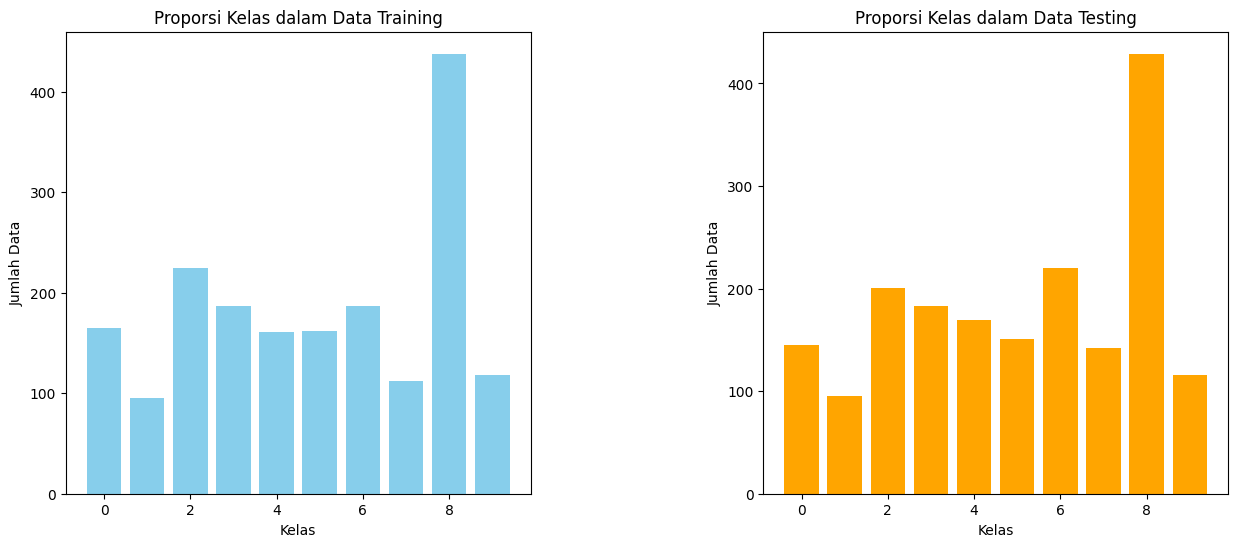

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().sort_index().index, y_train.value_counts().sort_index().values, color='skyblue')
plt.title('Proporsi Kelas dalam Data Training')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplot(1, 2, 2)
plt.bar(y_test.value_counts().sort_index().index, y_test.value_counts().sort_index().values, color='orange')
plt.title('Proporsi Kelas dalam Data Testing')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplots_adjust(wspace=0.5)
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Handling Multicollinearity

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.285890,-0.109488,-0.124214,0.165275,-0.130581,-0.122674,-0.155411,-0.133881,0.212021,0.134904
1,0.285890,1.000000,-0.056335,-0.050105,0.510028,-0.080799,-0.051771,-0.112650,-0.140457,0.289917,0.356702
2,-0.109488,-0.056335,1.000000,0.639953,0.289506,0.703387,0.653584,0.614746,0.395183,-0.097167,-0.066244
3,-0.124214,-0.050105,0.639953,1.000000,0.282589,0.670688,0.660939,0.697682,0.354174,-0.063174,-0.040907
4,0.165275,0.510028,0.289506,0.282589,1.000000,0.299876,0.285806,0.220613,0.071312,0.224749,0.315273
5,-0.130581,-0.080799,0.703387,0.670688,0.299876,1.000000,0.801603,0.692787,0.380509,-0.092808,-0.092155
6,-0.122674,-0.051771,0.653584,0.660939,0.285806,0.801603,1.000000,0.669220,0.327505,-0.095705,-0.080673
7,-0.155411,-0.112650,0.614746,0.697682,0.220613,0.692787,0.669220,1.000000,0.472784,-0.118073,-0.071928
8,-0.133881,-0.140457,0.395183,0.354174,0.071312,0.380509,0.327505,0.472784,1.000000,-0.084335,-0.118988
9,0.212021,0.289917,-0.097167,-0.063174,0.224749,-0.092808,-0.095705,-0.118073,-0.084335,1.000000,-0.056667


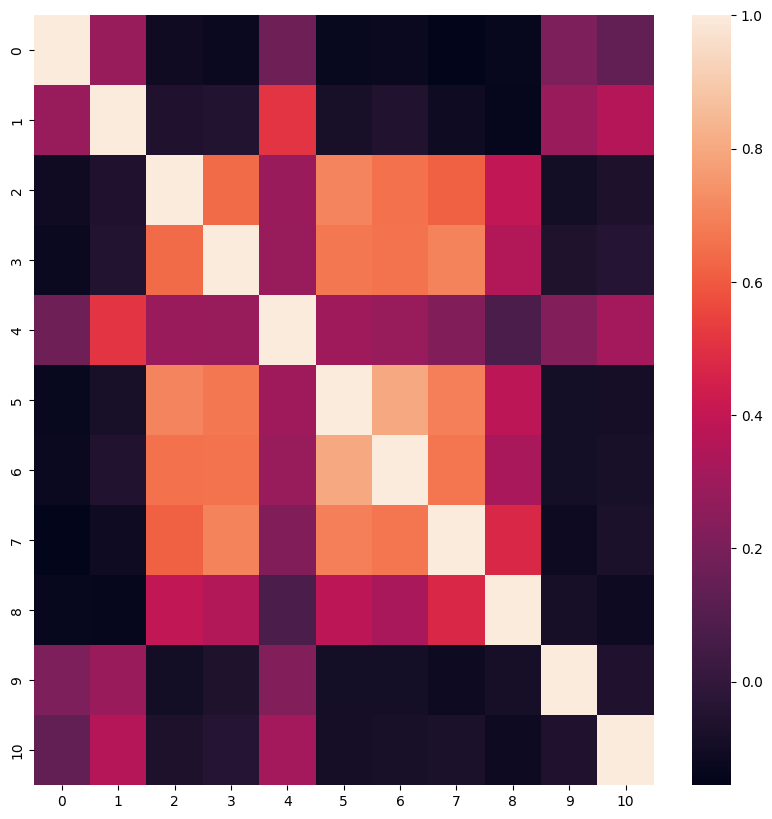

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0        1         2         3         4         5         6         7   \
0  NaN  0.28589 -0.109488 -0.124214  0.165275 -0.130581 -0.122674 -0.155411   
1  NaN      NaN -0.056335 -0.050105  0.510028 -0.080799 -0.051771 -0.112650   
2  NaN      NaN       NaN  0.639953  0.289506  0.703387  0.653584  0.614746   
3  NaN      NaN       NaN       NaN  0.282589  0.670688  0.660939  0.697682   
4  NaN      NaN       NaN       NaN       NaN  0.299876  0.285806  0.220613   
5  NaN      NaN       NaN       NaN       NaN       NaN  0.801603  0.692787   
6  NaN      NaN       NaN       NaN       NaN       NaN       NaN  0.669220   
7  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          8         9         10  
0  -0.133881  0.

<ipython-input-7-c4b4684553d1>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


Multilayer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam',
                    activation='logistic',
                    alpha=0.03,
                    learning_rate='constant',
                    learning_rate_init=0.1,
                    hidden_layer_sizes=(50, 100),
                    max_iter=500,
                    momentum=0.1,
                    random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.03, hidden_layer_sizes=(50, 100),
              learning_rate_init=0.1, max_iter=500, momentum=0.1,
              random_state=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Accuracy')
print(mlp.score(X_test, y_test))

predict = mlp.predict(X_test)

Accuracy
0.4700162074554295


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(accuracy_score(y_test, predict))

precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')

print("\n")
print("MSE: %f" % mean_squared_error(y_test, predict))
print("Precision: %f" % precision)
print("Recall: %f" % recall)
print("F1 Score: %f" % f1)

Training error: 1.263393
Training set score: 0.514595
Test set score: 0.470016
0.4700162074554295


MSE: 7.343598
Precision: 0.443079
Recall: 0.470016
F1 Score: 0.442271


## Split Data = 70:30

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 2/Experimental/Improved Datased/Feature Engineering/"Satisfaction" as Y/BA_AirlineReviews_final.csv')
dataset.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Route Departure,Route Arrival
0,8,1,2,1,1,1,1,0,0,0,6,109
1,6,1,1,2,3,1,2,0,1,2,129,23
2,3,0,2,3,3,4,3,1,4,0,6,193
3,8,1,2,3,3,1,1,0,0,0,6,193
4,8,0,2,1,1,1,1,0,1,1,6,22


Splitting Data

In [ ]:
y = dataset['Satisfaction']
X = dataset.drop('Satisfaction', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Jumlah data awal:", len(dataset))
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

print("\nProporsi kelas dalam data awal:")
print(y.value_counts().sort_index())

print("\nProporsi kelas dalam data training:")
print(y_train.value_counts().sort_index())

print("\nProporsi kelas dalam data testing:")
print(y_test.value_counts().sort_index())

Jumlah data awal: 3701
Jumlah data training: 2590
Jumlah data testing: 1111

Proporsi kelas dalam data awal:
0    310
1    190
2    426
3    370
4    330
5    313
6    407
7    254
8    867
9    234
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data training:
0    221
1    133
2    300
3    263
4    218
5    230
6    266
7    174
8    619
9    166
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data testing:
0     89
1     57
2    126
3    107
4    112
5     83
6    141
7     80
8    248
9     68
Name: Satisfaction, dtype: int64


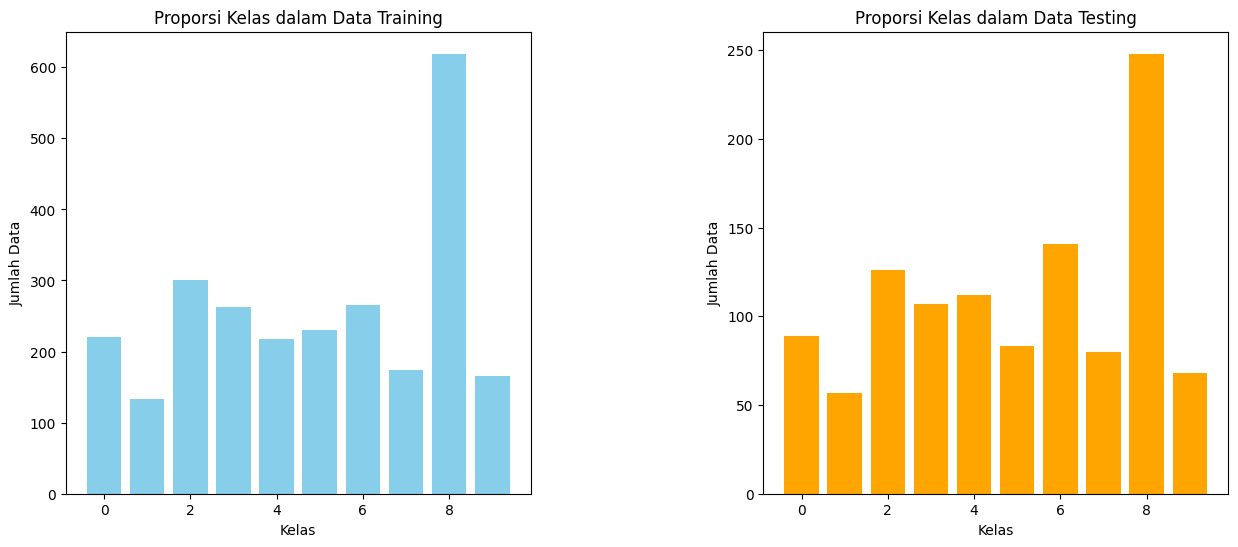

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().sort_index().index, y_train.value_counts().sort_index().values, color='skyblue')
plt.title('Proporsi Kelas dalam Data Training')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplot(1, 2, 2)
plt.bar(y_test.value_counts().sort_index().index, y_test.value_counts().sort_index().values, color='orange')
plt.title('Proporsi Kelas dalam Data Testing')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplots_adjust(wspace=0.5)
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Handling Multicollinearity

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.268933,-0.094332,-0.101665,0.168505,-0.111948,-0.101940,-0.130300,-0.116165,0.194429,0.129396
1,0.268933,1.000000,-0.027872,-0.034049,0.513634,-0.057098,-0.030489,-0.092794,-0.121077,0.278561,0.342907
2,-0.094332,-0.027872,1.000000,0.640790,0.303982,0.699700,0.647607,0.611050,0.392411,-0.096771,-0.057760
3,-0.101665,-0.034049,0.640790,1.000000,0.297997,0.673334,0.661129,0.700035,0.349265,-0.075261,-0.030827
4,0.168505,0.513634,0.303982,0.297997,1.000000,0.313629,0.299632,0.236333,0.088529,0.217665,0.308371
5,-0.111948,-0.057098,0.699700,0.673334,0.313629,1.000000,0.797431,0.698914,0.390647,-0.103543,-0.083337
6,-0.101940,-0.030489,0.647607,0.661129,0.299632,0.797431,1.000000,0.674721,0.346146,-0.102006,-0.077610
7,-0.130300,-0.092794,0.611050,0.700035,0.236333,0.698914,0.674721,1.000000,0.477447,-0.121916,-0.064730
8,-0.116165,-0.121077,0.392411,0.349265,0.088529,0.390647,0.346146,0.477447,1.000000,-0.087789,-0.112759
9,0.194429,0.278561,-0.096771,-0.075261,0.217665,-0.103543,-0.102006,-0.121916,-0.087789,1.000000,-0.073994


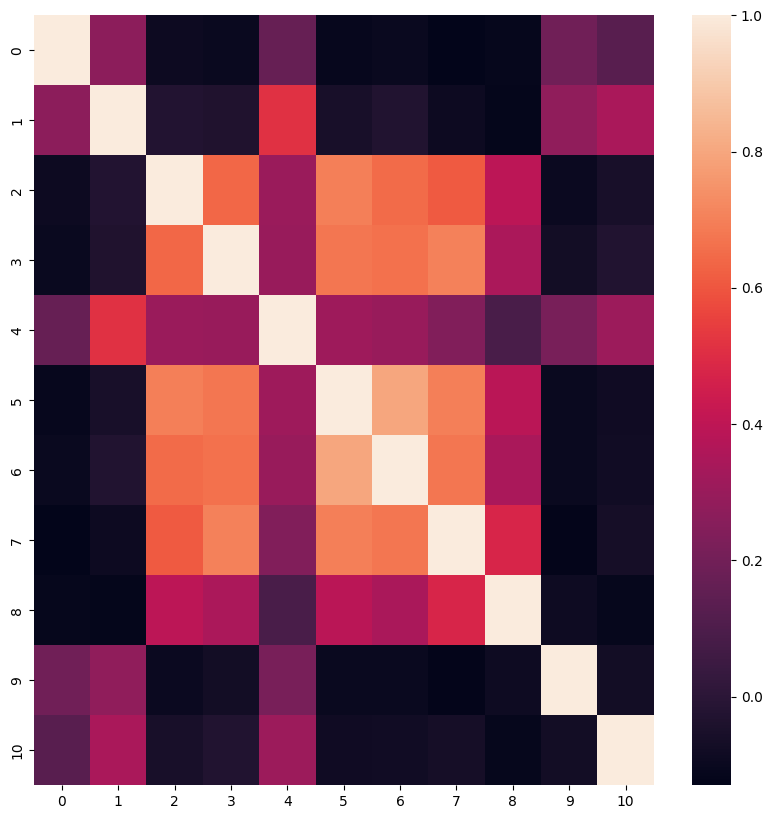

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN  0.268933 -0.094332 -0.101665  0.168505 -0.111948 -0.101940 -0.130300   
1  NaN       NaN -0.027872 -0.034049  0.513634 -0.057098 -0.030489 -0.092794   
2  NaN       NaN       NaN  0.640790  0.303982  0.699700  0.647607  0.611050   
3  NaN       NaN       NaN       NaN  0.297997  0.673334  0.661129  0.700035   
4  NaN       NaN       NaN       NaN       NaN  0.313629  0.299632  0.236333   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.797431  0.698914   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.674721   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          8         9         10  
0  -

<ipython-input-7-c4b4684553d1>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


Multilayer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam',
                    activation='logistic',
                    alpha=0.03,
                    learning_rate='constant',
                    learning_rate_init=0.1,
                    hidden_layer_sizes=(50, 100),
                    max_iter=500,
                    momentum=0.1,
                    random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.03, hidden_layer_sizes=(50, 100),
              learning_rate_init=0.1, max_iter=500, momentum=0.1,
              random_state=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Accuracy')
print(mlp.score(X_test, y_test))

predict = mlp.predict(X_test)

Accuracy
0.4302430243024302


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(accuracy_score(y_test, predict))

precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')

print("\n")
print("MSE: %f" % mean_squared_error(y_test, predict))
print("Precision: %f" % precision)
print("Recall: %f" % recall)
print("F1 Score: %f" % f1)

Training error: 1.258803
Training set score: 0.554440
Test set score: 0.430243
0.4302430243024302


MSE: 9.377138
Precision: 0.421550
Recall: 0.430243
F1 Score: 0.415185


## Split Data = 90:10

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 2/Experimental/Improved Datased/Feature Engineering/"Satisfaction" as Y/BA_AirlineReviews_final.csv')
dataset.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Route Departure,Route Arrival
0,8,1,2,1,1,1,1,0,0,0,6,109
1,6,1,1,2,3,1,2,0,1,2,129,23
2,3,0,2,3,3,4,3,1,4,0,6,193
3,8,1,2,3,3,1,1,0,0,0,6,193
4,8,0,2,1,1,1,1,0,1,1,6,22


Splitting Data

In [ ]:
y = dataset['Satisfaction']
X = dataset.drop('Satisfaction', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
print("Jumlah data awal:", len(dataset))
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

print("\nProporsi kelas dalam data awal:")
print(y.value_counts().sort_index())

print("\nProporsi kelas dalam data training:")
print(y_train.value_counts().sort_index())

print("\nProporsi kelas dalam data testing:")
print(y_test.value_counts().sort_index())

Jumlah data awal: 3701
Jumlah data training: 3330
Jumlah data testing: 371

Proporsi kelas dalam data awal:
0    310
1    190
2    426
3    370
4    330
5    313
6    407
7    254
8    867
9    234
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data training:
0    285
1    175
2    379
3    335
4    295
5    284
6    355
7    226
8    783
9    213
Name: Satisfaction, dtype: int64

Proporsi kelas dalam data testing:
0    25
1    15
2    47
3    35
4    35
5    29
6    52
7    28
8    84
9    21
Name: Satisfaction, dtype: int64


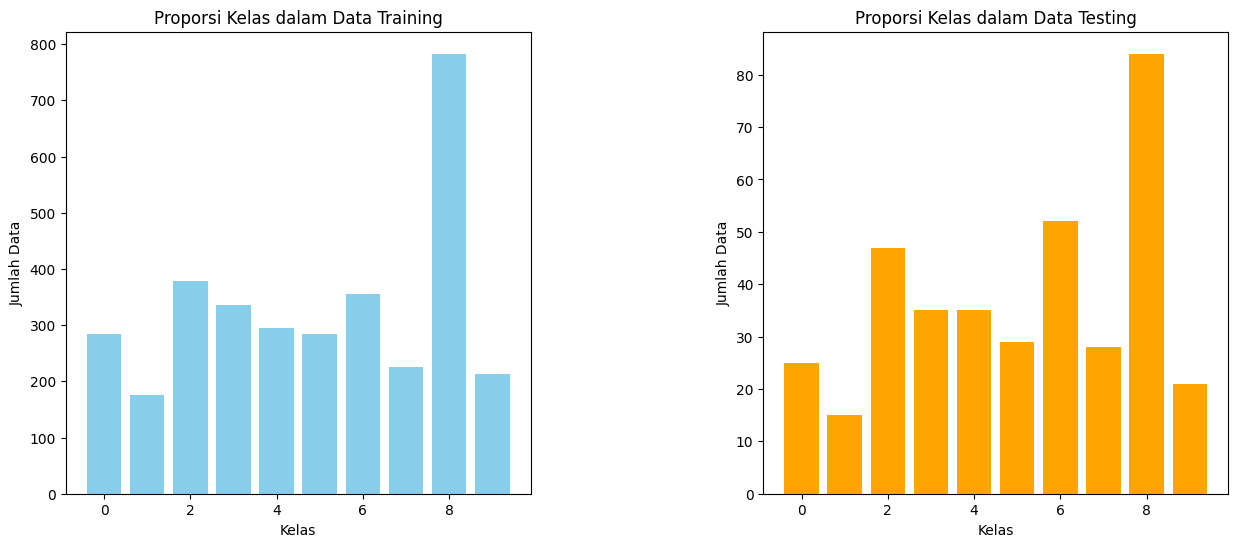

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().sort_index().index, y_train.value_counts().sort_index().values, color='skyblue')
plt.title('Proporsi Kelas dalam Data Training')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplot(1, 2, 2)
plt.bar(y_test.value_counts().sort_index().index, y_test.value_counts().sort_index().values, color='orange')
plt.title('Proporsi Kelas dalam Data Testing')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

plt.subplots_adjust(wspace=0.5)
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Handling Multicollinearity

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.278521,-0.094357,-0.091356,0.172386,-0.103803,-0.086690,-0.124111,-0.123495,0.180756,0.140392
1,0.278521,1.000000,-0.025670,-0.020734,0.517018,-0.042510,-0.024398,-0.076252,-0.125475,0.271455,0.343348
2,-0.094357,-0.025670,1.000000,0.648009,0.308363,0.706266,0.653229,0.623607,0.397850,-0.091092,-0.059394
3,-0.091356,-0.020734,0.648009,1.000000,0.316430,0.670842,0.654642,0.706176,0.349496,-0.070591,-0.015325
4,0.172386,0.517018,0.308363,0.316430,1.000000,0.324957,0.307818,0.253599,0.076136,0.208485,0.306303
5,-0.103803,-0.042510,0.706266,0.670842,0.324957,1.000000,0.798919,0.698633,0.386932,-0.100438,-0.083629
6,-0.086690,-0.024398,0.653229,0.654642,0.307818,0.798919,1.000000,0.674065,0.342177,-0.102350,-0.077268
7,-0.124111,-0.076252,0.623607,0.706176,0.253599,0.698633,0.674065,1.000000,0.474522,-0.115568,-0.063252
8,-0.123495,-0.125475,0.397850,0.349496,0.076136,0.386932,0.342177,0.474522,1.000000,-0.081481,-0.111852
9,0.180756,0.271455,-0.091092,-0.070591,0.208485,-0.100438,-0.102350,-0.115568,-0.081481,1.000000,-0.090152


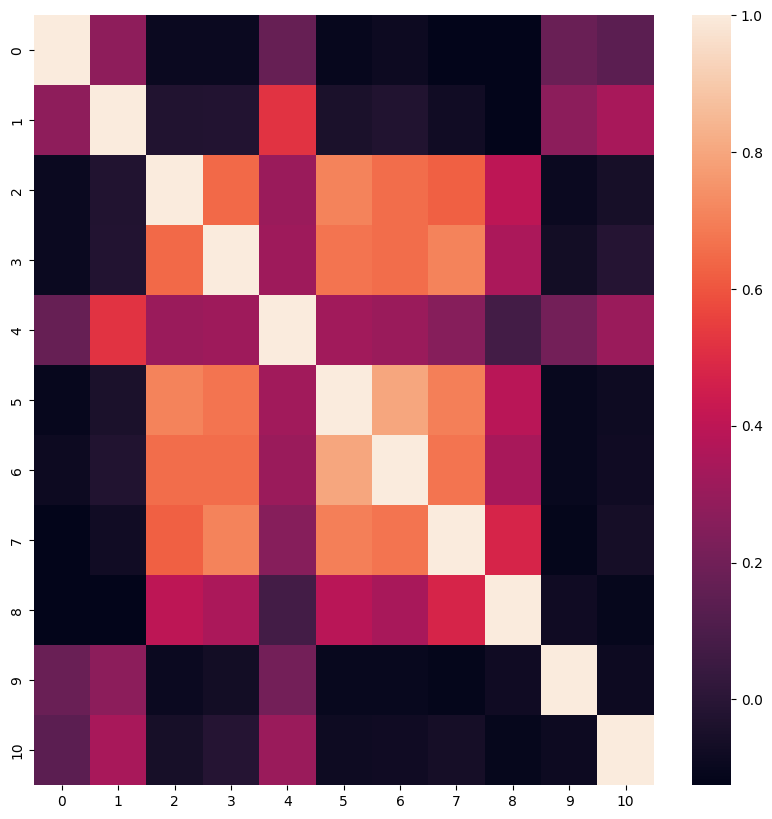

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN  0.278521 -0.094357 -0.091356  0.172386 -0.103803 -0.086690 -0.124111   
1  NaN       NaN -0.025670 -0.020734  0.517018 -0.042510 -0.024398 -0.076252   
2  NaN       NaN       NaN  0.648009  0.308363  0.706266  0.653229  0.623607   
3  NaN       NaN       NaN       NaN  0.316430  0.670842  0.654642  0.706176   
4  NaN       NaN       NaN       NaN       NaN  0.324957  0.307818  0.253599   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.798919  0.698633   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.674065   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          8         9         10  
0  -

<ipython-input-7-c4b4684553d1>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


Multilayer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam',
                    activation='logistic',
                    alpha=0.03,
                    learning_rate='constant',
                    learning_rate_init=0.1,
                    hidden_layer_sizes=(50, 100),
                    max_iter=500,
                    momentum=0.1,
                    random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.03, hidden_layer_sizes=(50, 100),
              learning_rate_init=0.1, max_iter=500, momentum=0.1,
              random_state=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Accuracy')
print(mlp.score(X_test, y_test))

predict = mlp.predict(X_test)

Accuracy
0.4528301886792453


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(accuracy_score(y_test, predict))

precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')

print("\n")
print("MSE: %f" % mean_squared_error(y_test, predict))
print("Precision: %f" % precision)
print("Recall: %f" % recall)
print("F1 Score: %f" % f1)

Training error: 1.290604
Training set score: 0.516817
Test set score: 0.452830
0.4528301886792453


MSE: 8.579515
Precision: 0.426631
Recall: 0.452830
F1 Score: 0.429779
